In [ ]:
import cv2
import numpy as np

# Function to load YOLOv3 model
def load_yolo(model_config, model_weights):
    net = cv2.dnn.readNetFromDarknet(model_config, model_weights)
    return net

# Function to perform object detection on an image
def detect_objects(net, image_path, confidence_threshold=0.5, nms_threshold=0.4):
    # Load image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Preprocess image
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layer indices
    output_layers = net.getUnconnectedOutLayers()

    # Get output layer names
    layer_names = net.getLayerNames()
    layer_names = [layer_names[i - 1] for i in output_layers.flatten()]

    # Forward pass
    outputs = net.forward(layer_names)

    # Post-process detections
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > confidence_threshold:
                # Calculate bounding box coordinates
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Print detected object information
                print(f"Detected object: Class ID: {class_id}, Confidence: {confidence:.2f}, Bounding Box: {x}, {y}, {x+w}, {y+h}")

# Main function
if __name__ == '__main__':
    # Paths to YOLOv3 model configuration and weights
    model_config = '/content/drive/MyDrive/DL-por/yolov3_custom.cfg'
    model_weights = '/content/drive/MyDrive/DL-por/backup/yolov3_custom_last.weights'

    # Path to test image
    image_path = '/content/img1.png'

    # Load YOLOv3 model
    net = load_yolo(model_config, model_weights)

    # Perform object detection
    detect_objects(net, image_path)


Detected object: Class ID: 0, Confidence: 0.90, Bounding Box: 231, 38, 364, 60
Detected object: Class ID: 0, Confidence: 0.95, Bounding Box: 431, 37, 574, 60
Detected object: Class ID: 3, Confidence: 0.63, Bounding Box: 620, 68, 728, 96
Detected object: Class ID: 3, Confidence: 0.85, Bounding Box: 605, 70, 753, 99
Detected object: Class ID: 2, Confidence: 0.79, Bounding Box: 622, 108, 788, 141
Detected object: Class ID: 0, Confidence: 0.80, Bounding Box: 31, 187, 150, 217
Detected object: Class ID: 0, Confidence: 0.80, Bounding Box: 36, 185, 154, 216
Detected object: Class ID: 2, Confidence: 0.77, Bounding Box: 419, 201, 574, 223
Detected object: Class ID: 1, Confidence: 0.99, Bounding Box: 620, 177, 679, 238
Detected object: Class ID: 1, Confidence: 0.78, Bounding Box: 683, 178, 724, 241
Detected object: Class ID: 1, Confidence: 0.99, Bounding Box: 692, 173, 726, 251
Detected object: Class ID: 1, Confidence: 0.97, Bounding Box: 745, 166, 783, 257
Detected object: Class ID: 1, Confiden

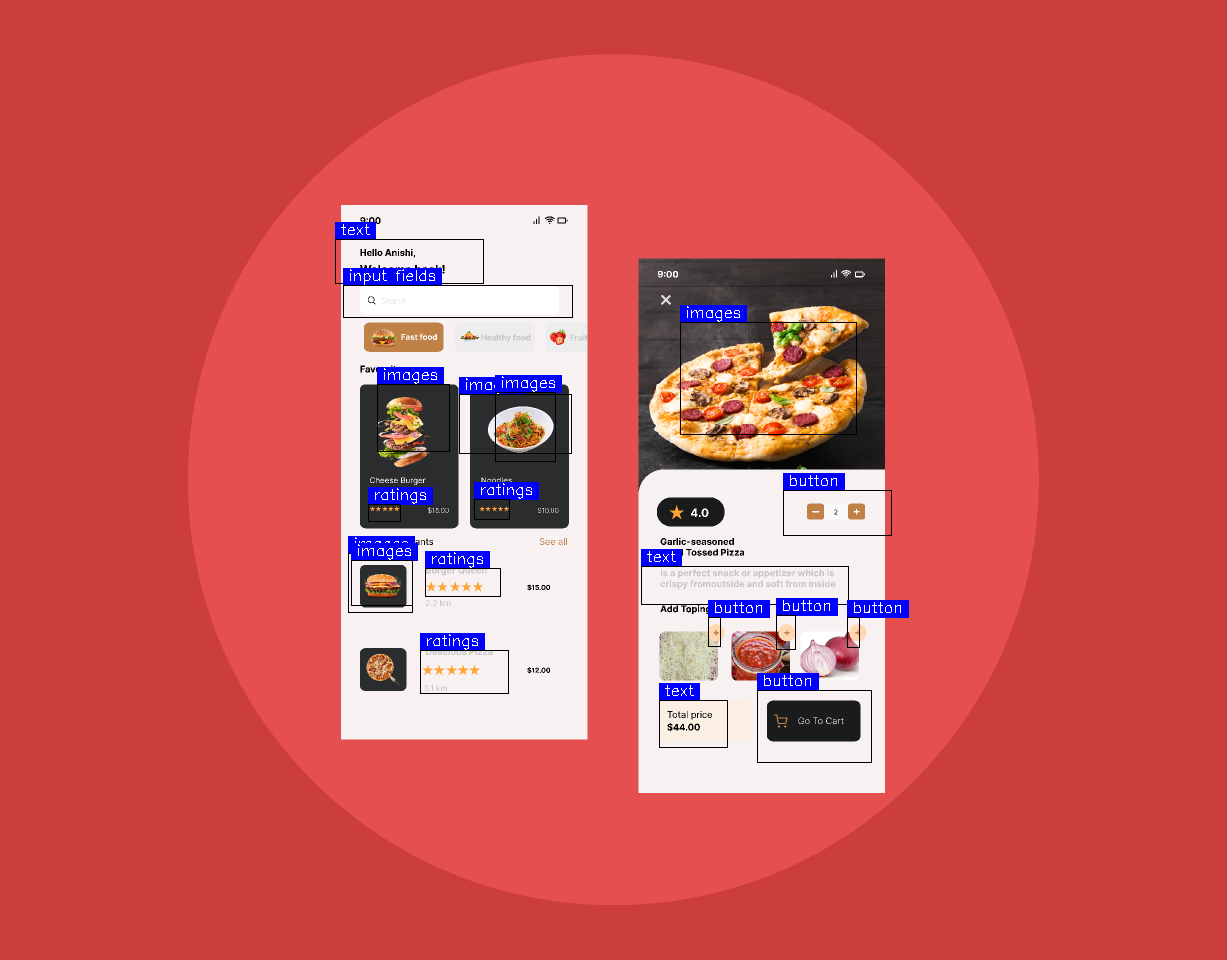

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Function to load YOLOv3 model
def load_yolo(model_config, model_weights):
    net = cv2.dnn.readNetFromDarknet(model_config, model_weights)
    return net

# Function to read class names from a file
def read_class_names(file_path):
    with open(file_path, 'r') as f:
        class_names = f.read().strip().split('\n')
    return class_names

# Function to perform object detection on an image
def detect_objects(net, image_path, class_names, confidence_threshold=0.5, nms_threshold=0.4):
    # Load image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Preprocess image
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layer indices
    output_layers = net.getUnconnectedOutLayers()

    # Get output layer names
    layer_names = net.getLayerNames()
    layer_names = [layer_names[i - 1] for i in output_layers.flatten()]

    # Forward pass
    outputs = net.forward(layer_names)

    # Post-process detections
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > confidence_threshold:
                # Calculate bounding box coordinates
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Draw filled rectangle as background for text
                text_size, _ = cv2.getTextSize(class_names[class_id], cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                cv2.rectangle(image, (x, y - text_size[1] - 5), (x + text_size[0] + 10, y), (255, 0, 0), -1)

                # Draw bounding box and label on the image
                color = (255, 0, 0)  # Green color
                cv2.rectangle(image, (x, y), (x + w, y + h), 2)
                cv2.putText(image, class_names[class_id], (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # Display the image
    cv2_imshow(image)

# Main function
if __name__ == '__main__':
    # Paths to YOLOv3 model configuration and weights
    model_config = '/content/drive/MyDrive/DL-por/yolov3_custom.cfg'
    model_weights = '/content/drive/MyDrive/DL-por/backup/yolov3_custom_last.weights'

    # Path to test image
    image_path = '/content/img10.png'

    # Path to class names file
    class_names_file = '/content/drive/MyDrive/DL-por/obj.names.txt'

    # Load YOLOv3 model
    net = load_yolo(model_config, model_weights)

    # Read class names from file
    class_names = read_class_names(class_names_file)

    # Perform object detection and visualize
    detect_objects(net, image_path, class_names)


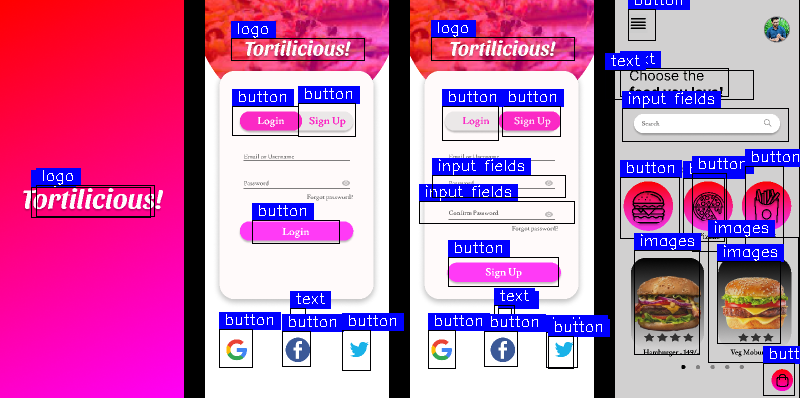

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Function to load YOLOv3 model
def load_yolo(model_config, model_weights):
    net = cv2.dnn.readNetFromDarknet(model_config, model_weights)
    return net

# Function to read class names from a file
def read_class_names(file_path):
    with open(file_path, 'r') as f:
        class_names = f.read().strip().split('\n')
    return class_names

# Function to perform object detection on an image
def detect_objects(net, image_path, class_names, confidence_threshold=0.5, nms_threshold=0.4):
    # Load image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Preprocess image
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layer indices
    output_layers = net.getUnconnectedOutLayers()

    # Get output layer names
    layer_names = net.getLayerNames()
    layer_names = [layer_names[i - 1] for i in output_layers.flatten()]

    # Forward pass
    outputs = net.forward(layer_names)

    # Post-process detections
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > confidence_threshold:
                # Calculate bounding box coordinates
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Draw filled rectangle as background for text
                text_size, _ = cv2.getTextSize(class_names[class_id], cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                cv2.rectangle(image, (x, y - text_size[1] - 5), (x + text_size[0] + 10, y), (255, 0, 0), -1)

                # Draw bounding box and label on the image
                color = (255, 0, 0)  # Blue color
                cv2.rectangle(image, (x, y), (x + w, y + h), 2)
                cv2.putText(image, class_names[class_id], (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # Display the image
    cv2_imshow(image)

# Main function
if __name__ == '__main__':
    # Paths to YOLOv3 model configuration and weights
    model_config = '/content/drive/MyDrive/DL-por/yolov3_custom.cfg'
    model_weights = '/content/drive/MyDrive/DL-por/backup/yolov3_custom_last.weights'

    # Path to test image
    image_path = '/content/img1.png'

    # Path to class names file
    class_names_file = '/content/drive/MyDrive/DL-por/obj.names.txt'

    # Load YOLOv3 model
    net = load_yolo(model_config, model_weights)

    # Read class names from file
    class_names = read_class_names(class_names_file)

    # Perform object detection and visualize
    detect_objects(net, image_path, class_names)
